In [27]:
# 1. Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import os


In [ ]:
dataSetPath = r"..\1_DataSets\iris.csv"

dataset = pd.read_csv(dataSetPath) 


print(f"Dataset Columns: {dataset.columns.to_list()}")
print("****************************")
print(f"Dataset Shape: {dataset.shape}")
print("****************************")

totalNumberOfRowInActualDataset = len(dataset)
print(f"Total Rows in dataset File: {totalNumberOfRowInActualDataset}")

Dataset Columns: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']
****************************
Dataset Shape: (150, 5)
****************************
Total Rows in dataset File: 150


In [29]:
dataset.drop_duplicates(inplace=True)
print(f"Dataset Shape after removing duplcates: {dataset.shape}")
print("****************************")

numberOfRowAfterRemovingDuplicates = len(dataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingDuplicates}")

print("****************************")
print(f"Total Duplicates: {(totalNumberOfRowInActualDataset - numberOfRowAfterRemovingDuplicates)}")

Dataset Shape after removing duplcates: (149, 5)
****************************
Remaining Rows in Dataset: 149
****************************
Total Duplicates: 1


In [30]:
# Step 2: Handle missing values (remove rows with missing values)
cleanedDataset = dataset.dropna()
numberOfRowAfterRemovingNullValues = len(cleanedDataset)
print(f"Remaining Rows in Dataset: {numberOfRowAfterRemovingNullValues}")

print("****************************")
print(f"Removed Number of rows containing Null Values: {( numberOfRowAfterRemovingDuplicates - numberOfRowAfterRemovingNullValues)}")

Remaining Rows in Dataset: 149
****************************
Removed Number of rows containing Null Values: 0


In [31]:
cleanedDataset.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [32]:
cleanedDataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [33]:
unique_classes = cleanedDataset[cleanedDataset.columns.to_list()[-1]].unique()
print("Unique Target Classes:", unique_classes)

Unique Target Classes: ['Setosa' 'Versicolor' 'Virginica']


In [34]:
# Encode the target column if it's categorical
if cleanedDataset[cleanedDataset.columns.to_list()[-1]].dtype == 'object':
    cleanedDataset[cleanedDataset.columns.to_list()[-1]] = cleanedDataset[cleanedDataset.columns.to_list()[-1]].astype('category').cat.codes


In [35]:
cleanedDataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  149 non-null    float64
 1   sepal.width   149 non-null    float64
 2   petal.length  149 non-null    float64
 3   petal.width   149 non-null    float64
 4   variety       149 non-null    int8   
dtypes: float64(4), int8(1)
memory usage: 6.0 KB


In [ ]:
# 5. Exploratory Data Analysis (EDA) and Plotting
# Pairplot for feature visualization
sns.pairplot(cleanedDataset, hue='variety', diag_kind='kde')
plt.suptitle("Feature Relationships", y=1.02)
plt.show()




In [ ]:
# Scatterplot of features
firstFeatureIndex = 0
secondFeatureIndex = 1
plt.figure(figsize=(10, 8))
sns.scatterplot(x=cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], y=cleanedDataset[cleanedDataset.columns.to_list()[secondFeatureIndex]], hue=cleanedDataset[cleanedDataset.columns.to_list()[-1]], palette='deep', s=70)
plt.title(f"{cleanedDataset.columns.to_list()[firstFeatureIndex]} vs {cleanedDataset.columns.to_list()[secondFeatureIndex]}")
plt.show()

In [ ]:
# Scatterplot of features
firstFeatureIndex = 0
secondFeatureIndex = 2
plt.figure(figsize=(10, 8))
sns.scatterplot(x=cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], y=cleanedDataset[cleanedDataset.columns.to_list()[secondFeatureIndex]], hue=cleanedDataset[cleanedDataset.columns.to_list()[-1]], palette='deep', s=70)
plt.title(f"{cleanedDataset.columns.to_list()[firstFeatureIndex]} vs {cleanedDataset.columns.to_list()[secondFeatureIndex]}")
plt.show()

In [ ]:
# Scatterplot of features
firstFeatureIndex = 0
secondFeatureIndex = 3
plt.figure(figsize=(10, 8))
sns.scatterplot(x=cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], y=cleanedDataset[cleanedDataset.columns.to_list()[secondFeatureIndex]], hue=cleanedDataset[cleanedDataset.columns.to_list()[-1]], palette='deep', s=70)
plt.title(f"{cleanedDataset.columns.to_list()[firstFeatureIndex]} vs {cleanedDataset.columns.to_list()[secondFeatureIndex]}")
plt.show()

In [ ]:
# Scatterplot of features
firstFeatureIndex = 1
secondFeatureIndex = 2
plt.figure(figsize=(10, 8))
sns.scatterplot(x=cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], y=cleanedDataset[cleanedDataset.columns.to_list()[secondFeatureIndex]], hue=cleanedDataset[cleanedDataset.columns.to_list()[-1]], palette='deep', s=70)
plt.title(f"{cleanedDataset.columns.to_list()[firstFeatureIndex]} vs {cleanedDataset.columns.to_list()[secondFeatureIndex]}")
plt.show()

In [ ]:
# Scatterplot of features
firstFeatureIndex = 1
secondFeatureIndex = 3
plt.figure(figsize=(10, 8))
sns.scatterplot(x=cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], y=cleanedDataset[cleanedDataset.columns.to_list()[secondFeatureIndex]], hue=cleanedDataset[cleanedDataset.columns.to_list()[-1]], palette='deep', s=70)
plt.title(f"{cleanedDataset.columns.to_list()[firstFeatureIndex]} vs {cleanedDataset.columns.to_list()[secondFeatureIndex]}")
plt.show()

In [ ]:
# Scatterplot of features
firstFeatureIndex = 2
secondFeatureIndex = 3
plt.figure(figsize=(10, 8))
sns.scatterplot(x=cleanedDataset[cleanedDataset.columns.to_list()[firstFeatureIndex]], y=cleanedDataset[cleanedDataset.columns.to_list()[secondFeatureIndex]], hue=cleanedDataset[cleanedDataset.columns.to_list()[-1]], palette='deep', s=70)
plt.title(f"{cleanedDataset.columns.to_list()[firstFeatureIndex]} vs {cleanedDataset.columns.to_list()[secondFeatureIndex]}")
plt.show()

In [36]:
# 6. Splitting Data (40% for Testing, 60% for Training)
X = cleanedDataset.iloc[:, :-1]  # Features
Y = cleanedDataset.iloc[:, -1]   # Target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (89, 4)
Testing Data Shape: (60, 4)


In [45]:
# 7. Instantiating LR Model
model = LinearRegression()
model.fit(X, Y)

# Generate predictions (the regression line)
Y_pred = model.predict(X_test)


length of Y_pred: 60
length of y_pred_classes: 60
length of y_test: 60


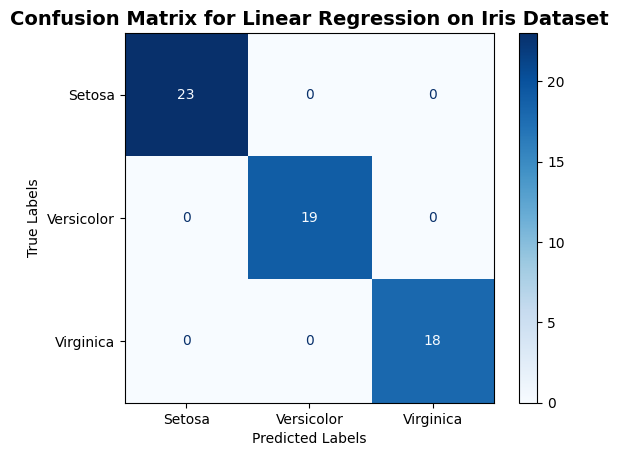

In [46]:

# Convert regression predictions to nearest integer class labels
y_pred_classes = np.rint(Y_pred).astype(int)  # Round to nearest integer
y_pred_classes = np.clip(y_pred_classes, 0, (len(unique_classes)-1))  # Ensure valid class indices

print(f"length of Y_pred: {len(Y_pred)}")
print(f"length of y_pred_classes: {len(y_pred_classes)}")
print(f"length of y_test: {len(y_test)}")
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(cmap='Blues', values_format='d')

# Add title and labels
plt.title("Confusion Matrix for Linear Regression on Iris Dataset", fontsize=14, fontweight="bold")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()